<a href="https://colab.research.google.com/github/FahmidaNourin/CSE445_Machine_Learning/blob/main/practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
type(df)

pandas.core.frame.DataFrame

In [55]:
import pandas as pd
import numpy as np



df = pd.read_csv("/content/train.csv")

In [56]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [57]:
df.shape

(700, 2)

# df = df.dropna().reset_index(drop=True)  
this code is used when dataset has any null values

In [58]:
df = df.dropna().reset_index(drop=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.0 KB


In [60]:
from sklearn.linear_model import LinearRegression

X = df["x"].values.reshape(-1,1)                 # 2d panda Data Frame to 1d np array
Y = df["y"].values.reshape(-1,1)

model = LinearRegression().fit(X,Y)

In [61]:
m = model.coef_[0]
c = model.intercept_

print("Slope: ",m)
print("Intercept: ",c)

Slope:  [1.00065638]
Intercept:  [-0.10726546]


In [62]:
x=2

y = m*x+c


print("The Predicted value: ",y)

The Predicted value:  [1.8940473]


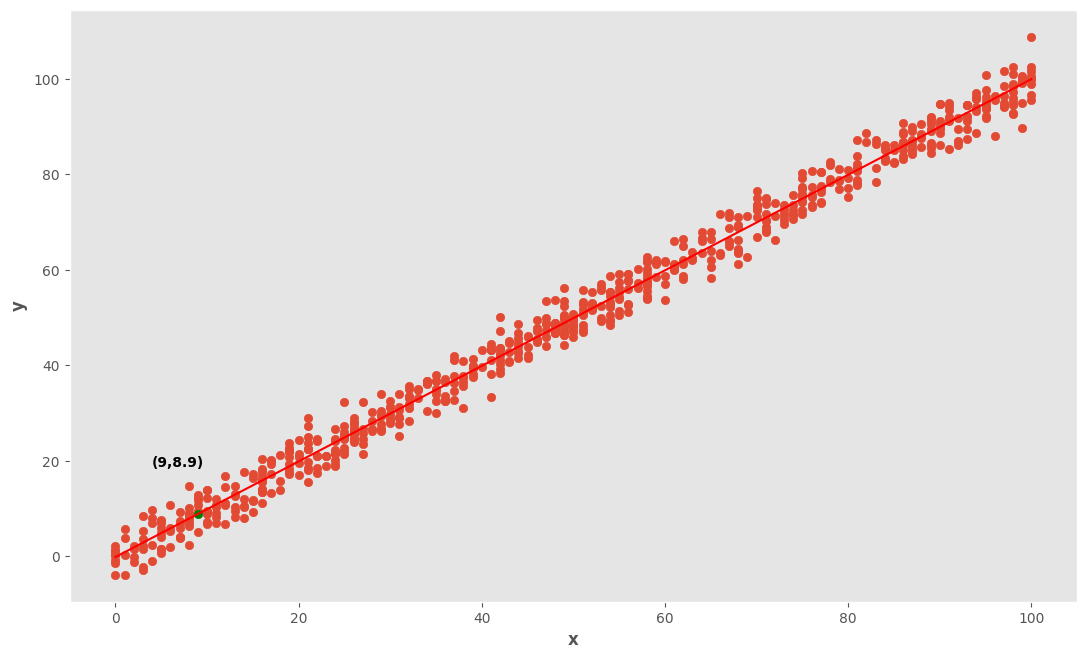

In [63]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

ax.scatter(X, Y)
rang_x=[X.min(),X.max()]
ax.plot(rang_x,m*rang_x+c, color = "red")



per_x = 9
per_y = m*per_x+c
ax.scatter(per_x, per_y, color='green')
ax.annotate('('+str(per_x)+','+str(round(per_y[0],2))+')', xy=(per_x, per_y), xytext=(per_x-5, per_y+10),fontweight='bold')




ax.set_xlabel("x",fontweight='bold',fontsize=12)
ax.set_ylabel("y",fontweight='bold',fontsize=12)
ax.grid()
plt.show()


In [65]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline


import numpy as np



df = pd.read_csv("/content/train.csv")

In [66]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [68]:
df = df.dropna().reset_index(drop=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.0 KB


In [71]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[49.9796748  49.94807558]
 [84.97272727 85.07330026]
 [17.04291845 16.75800816]]
[2 0 2 0 1 0 2 1 2 2 2 2 2 0 0 0 2 1 2 2 1 1 0 0 1 0 0 2 1 0 2 2 0 2 0 1 0
 2 2 0 1 2 0 2 0 2 0 0 2 0 1 0 2 0 2 2 1 0 2 2 0 1 2 0 2 0 2 2 2 1 2 0 2 0
 2 0 2 2 2 0 1 2 2 2 1 2 1 2 1 1 0 1 0 2 0 0 2 1 2 1 1 2 0 0 2 2 1 2 2 0 0
 1 1 1 0 2 0 2 2 1 1 0 2 0 0 0 0 2 0 2 0 0 2 0 1 1 1 2 1 0 0 1 2 2 2 1 1 0
 2 1 0 0 0 0 1 1 2 0 1 1 2 2 1 2 0 1 2 1 1 1 1 0 2 0 0 0 2 1 0 0 2 0 0 0 2
 2 1 2 2 2 0 2 0 2 0 1 2 2 2 0 0 0 1 1 2 0 2 0 0 0 2 2 1 1 2 1 0 1 0 0 1 0
 0 1 1 0 1 0 0 1 1 1 0 2 0 1 1 0 0 2 1 2 0 0 0 0 1 1 0 1 2 0 2 1 0 0 0 0 0
 2 0 2 1 2 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 2 2 2 1 0 1 0 2 2 0 2 0 0 1
 1 1 2 1 0 0 1 2 1 1 1 0 2 2 2 2 2 2 1 1 1 1 0 2 2 1 2 0 1 1 2 2 2 1 2 1 0
 1 2 2 0 0 2 1 2 2 1 2 0 1 0 2 0 0 0 0 1 1 0 1 2 0 2 1 1 2 1 1 0 2 2 1 0 1
 1 1 2 0 1 1 2 2 0 1 1 2 0 1 0 0 2 1 2 0 0 2 0 1 2 2 2 0 1 0 2 0 0 1 2 0 0
 2 1 1 2 2 0 1 1 0 1 1 0 0 1 0 0 2 1 0 1 1 0 2 1 2 1 1 2 1 2 1 2 0 2 0 1 1
 1 1 2 0 0 2 1 1 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [73]:
df['labels'] = labels
df.head(df.shape[0])

,x,y,labels
0,24.0,21.549452,2
1,50.0,47.464463,0
2,15.0,17.218656,2
3,38.0,36.586398,0
4,87.0,87.288984,1
...,...,...,...
694,58.0,58.595006,0
695,93.0,94.625094,1
696,82.0,88.603770,1
697,66.0,63.648685,0


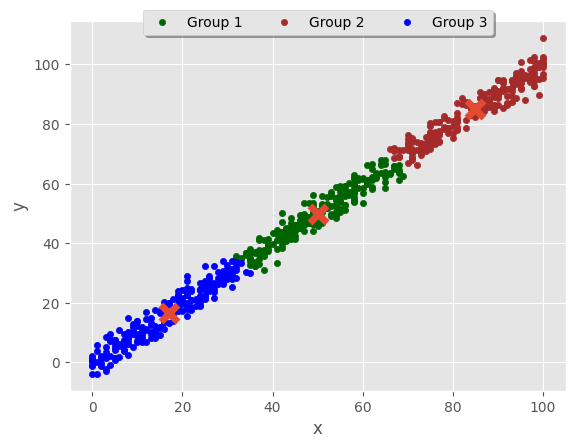

In [75]:
df['labels'] = labels

#plt.plot(data, colors[data['labels'], markersize = 10)

group1 = df[df['labels']==0].plot( kind='scatter', x='x', y='y', color='DarkGreen', label="Group 1" )
group2 = df[df['labels']==1].plot( kind='scatter', x='x', y='y', color='Brown', ax=group1, label="Group 2" )
group3 = df[df['labels']==2].plot( kind='scatter', x='x', y='y', color='Blue', ax=group1, label="Group 3" )






group1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()

In [77]:
for i in range(100):
  print("Yes all right, well done!!")

Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Yes all right, well done!!
Y